In [8]:
!pwd
!ls -al

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_orig = pd.read_csv('AmesHousing.csv')
df_orig.drop(['PID', 'Order'], axis=1, inplace=True)
df_orig.head()


/Users/manusokane/Desktop/University/UU Computer Science/COM747 - Data Science & Machine Learning/ML_HousePriceAssignment
total 1904
drwxr-xr-x   6 manusokane  staff     192 Apr  3 21:14 .
drwxr-xr-x@  7 manusokane  staff     224 Apr  3 20:32 ..
drwxr-xr-x  14 manusokane  staff     448 Apr  3 21:00 .git
-rw-r--r--@  1 manusokane  staff  963738 Apr  3 21:14 AmesHousing.csv
-rw-r--r--   1 manusokane  staff    3526 Apr  3 21:00 ML_HousePriceNotebook.ipynb
-rw-r--r--   1 manusokane  staff      31 Apr  3 20:36 README.md


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
# Data Analysis

Understand what type of features we have in our data
Check if any columns contain null values

In [21]:
numeric_features = df_orig.select_dtypes(include=['int', 'float'])
categorical_features = df_orig.select_dtypes(include=['object'])

print(f"Numeric features: {len(numeric_features.columns)}")
print(f"Numeric features: {numeric_features.columns}\n")
print(f"Categorical features: {len(categorical_features.columns)}")
print(f"Categorical features: {categorical_features.columns}\n\n")

Numeric features: 37
Numeric features: Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

Categorical features: 43
Categorical features: Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 

In [ ]:
# Check for missing values
total_columns_with_missing_values = df_orig.isnull().any().sum()
print(f"Total number of columns with missing values: {total_columns_with_missing_values}\n")

# Check for missing values in numeric features
missing_numeric = numeric_features.columns[numeric_features.isnull().any()]
missing_numeric = missing_numeric.sort_values(ascending=False)
print(f"Missing values in numeric features: {missing_numeric}\n")

# Check for missing values in categorical features
missing_categorical = categorical_features.columns[categorical_features.isnull().any()]
missing_categorical = missing_categorical.sort_values(ascending=False)
print(f"Missing values in categorical features: {missing_categorical}\n")



Total number of columns with missing values: 27

Missing values in numeric features: Index(['Total Bsmt SF', 'Mas Vnr Area', 'Lot Frontage', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'BsmtFin SF 2', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Bsmt Half Bath', 'Bsmt Full Bath'],
      dtype='object')

Missing values in categorical features: Index(['Pool QC', 'Misc Feature', 'Mas Vnr Type', 'Garage Type', 'Garage Qual',
       'Garage Finish', 'Garage Cond', 'Fireplace Qu', 'Fence', 'Electrical',
       'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Exposure',
       'Bsmt Cond', 'Alley'],
      dtype='object')



# Data Cleaning

What to do with missing values?
Encoding?

Graph showing NaN values below


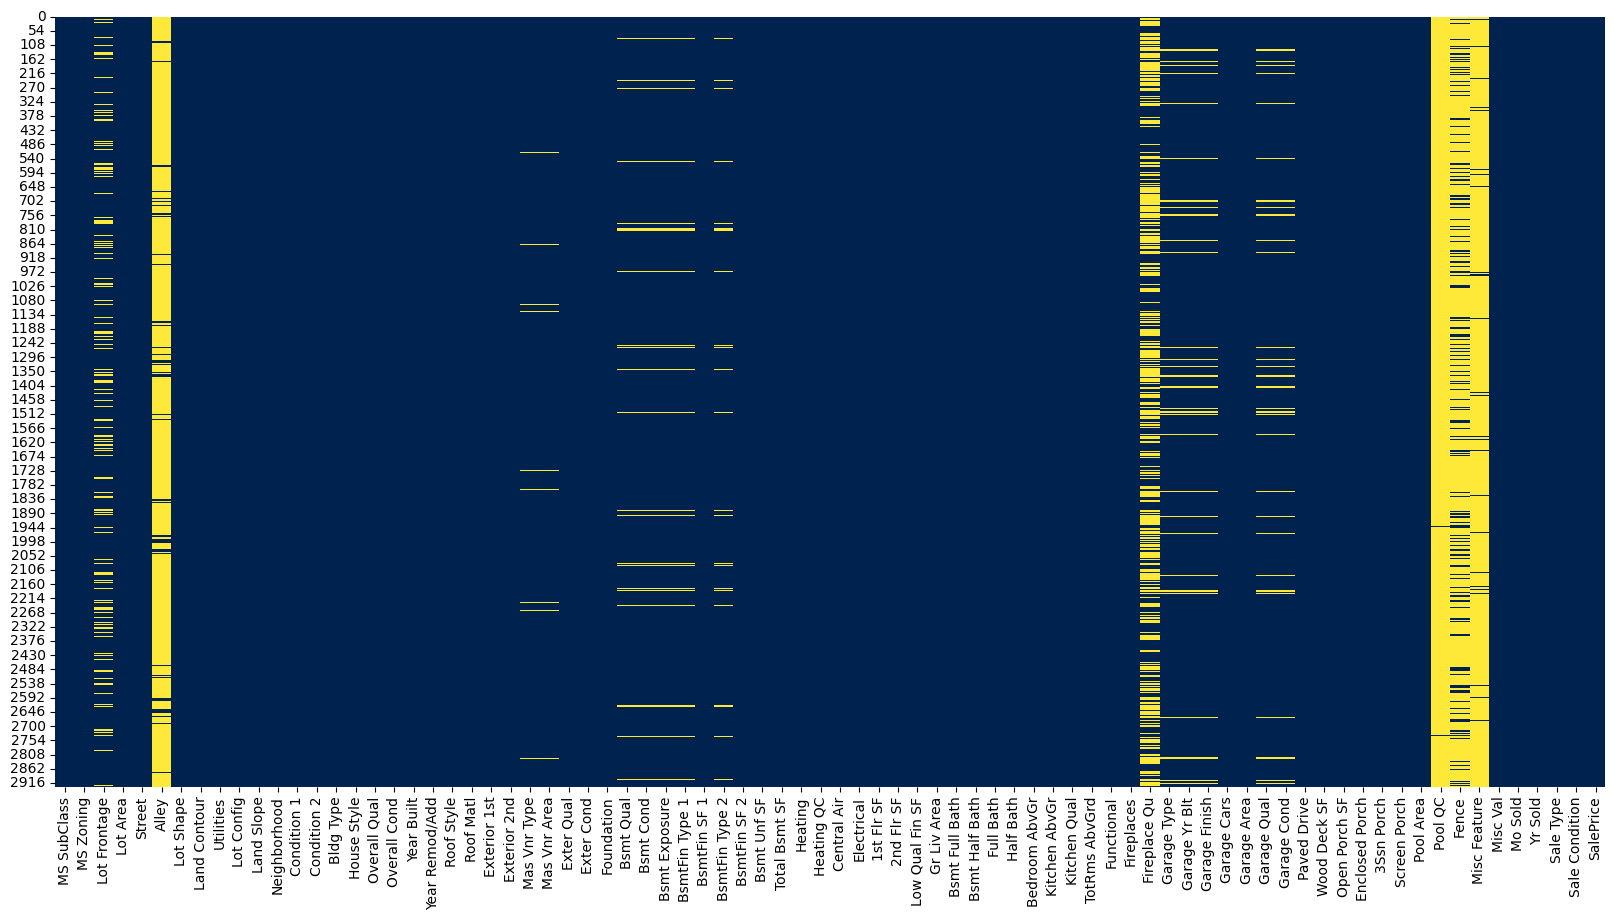

In [40]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_orig.isnull(), cbar=False, cmap='cividis')
plt.show()

Alley / Pool QC / Fence / Misc Feature contains mainly NaN values

description of the data mentions that alley / fence mean no access. Pool Qc means no pool

fireplaceQu has NaN values when fireplace is 0

Columns with numeric values: use mean in place of NaN
Columns with catergorical values: fill empty values with 


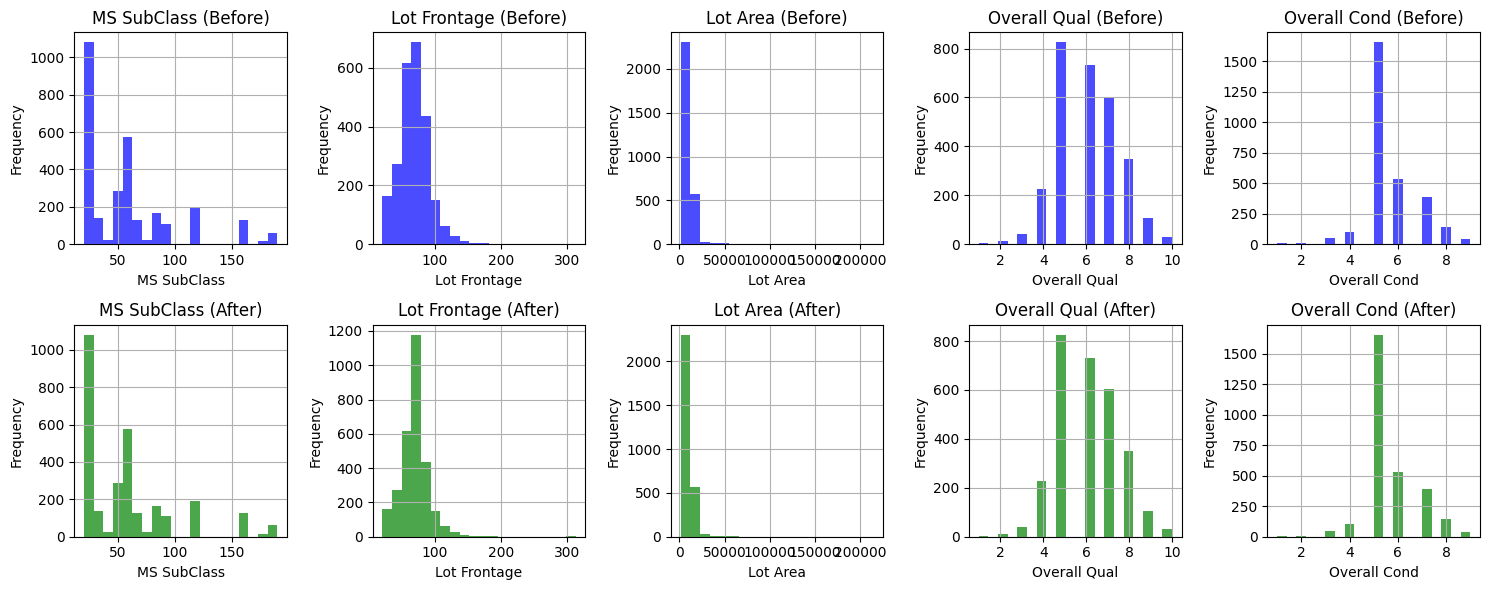

In [48]:


def missing_values_num(df):
    """Function to ....."""
    numerical_cols = df.select_dtypes(include=['int', 'float']).columns
    for col in numerical_cols:
        if df[col].isnull().sum() > 0: #check for missing values
            df[col].fillna(df[col].mean(), inplace=True)
    
    return df

numerical_cols = df_orig.select_dtypes(include=['int', 'float']).columns

# Plot histograms before filling missing values
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols[:5]):  # Limit to first 5 columns for visualization
    plt.subplot(2, 5, i + 1)
    df_orig[col].hist(bins=20, alpha=0.7, label='Before', color='blue')
    plt.title(f"{col} (Before)")
    plt.xlabel(col)
    plt.ylabel("Frequency")

# Apply the function to fill missing values
df_orig = missing_values_num(df_orig)

# Plot histograms after filling missing values
for i, col in enumerate(numerical_cols[:5]):  # Limit to first 5 columns for visualization
    plt.subplot(2, 5, i + 6)
    df_orig[col].hist(bins=20, alpha=0.7, label='After', color='green')
    plt.title(f"{col} (After)")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()